In [267]:
import pandas as pd

In [268]:
dados = pd.read_csv('./output/data/dfImoveis.csv')

In [269]:
dados

,Cidade,Bairro,Preco,M²,Tipo,Suíte,Quarto,Vaga
0,brasilia,asa-norte,NaN,NaN,NaN,NaN,NaN,NaN
1,brasilia,asa-norte,205000.0,25.0,Kitnet,1.0,NaN,NaN
2,brasilia,asa-norte,170000.0,35.0,Loja,NaN,NaN,NaN
3,brasilia,asa-norte,215503.0,25.0,Kitnet,NaN,1.0,1.0
4,brasilia,asa-norte,NaN,387.0,a,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...
2152,vila-estrutural,vila-estrutural,150000.0,90.0,Casa,NaN,3.0,1.0
2153,vila-estrutural,vila-estrutural,180000.0,80.0,Casa,1.0,2.0,1.0
2154,vila-estrutural,vila-estrutural,199500.0,136.0,Casa,NaN,3.0,NaN
2155,vila-estrutural,vila-estrutural,199500.0,80.0,Casa,NaN,3.0,3.0


In [270]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157 entries, 0 to 2156
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cidade  2157 non-null   object 
 1   Bairro  2157 non-null   object 
 2   Preco   2124 non-null   float64
 3   M²      2001 non-null   float64
 4   Tipo    2001 non-null   object 
 5   Suíte   1159 non-null   float64
 6   Quarto  1656 non-null   float64
 7   Vaga    1393 non-null   float64
dtypes: float64(5), object(3)
memory usage: 134.9+ KB


In [271]:
troca = {
    'Preco': 'Valor',
    'M²': 'Area'
}

dados.rename(columns=troca, inplace=True)

In [272]:
dados

,Cidade,Bairro,Valor,Area,Tipo,Suíte,Quarto,Vaga
0,brasilia,asa-norte,NaN,NaN,NaN,NaN,NaN,NaN
1,brasilia,asa-norte,205000.0,25.0,Kitnet,1.0,NaN,NaN
2,brasilia,asa-norte,170000.0,35.0,Loja,NaN,NaN,NaN
3,brasilia,asa-norte,215503.0,25.0,Kitnet,NaN,1.0,1.0
4,brasilia,asa-norte,NaN,387.0,a,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...
2152,vila-estrutural,vila-estrutural,150000.0,90.0,Casa,NaN,3.0,1.0
2153,vila-estrutural,vila-estrutural,180000.0,80.0,Casa,1.0,2.0,1.0
2154,vila-estrutural,vila-estrutural,199500.0,136.0,Casa,NaN,3.0,NaN
2155,vila-estrutural,vila-estrutural,199500.0,80.0,Casa,NaN,3.0,3.0


In [273]:
tipos_de_dados = pd.DataFrame(dados.dtypes, columns= ['Tipos de dados'])
tipos_de_dados.columns.name = 'Variáveis'

In [274]:
tipos_de_dados

Variáveis,Tipos de dados
Cidade,object
Bairro,object
Valor,float64
Area,float64
Tipo,object
Suíte,float64
Quarto,float64
Vaga,float64


In [275]:
print('A base de dados apresenta {} registros (imóveis) e {} variáveis'. format(dados.shape[0], dados.shape[1]) )

A base de dados apresenta 2157 registros (imóveis) e 8 variáveis


In [276]:
tipos_de_imoveis = dados['Tipo'].drop_duplicates()
tipos_de_imoveis = pd.DataFrame(tipos_de_imoveis)
tipos_de_imoveis

,Tipo
0,NaN
1,Kitnet
2,Loja
4,a
5,Apartamento
10,Flat
23,Sala
27,Casa
105,Comercial
128,Lote/Terreno


In [277]:
tipos_de_imoveis.index = range(tipos_de_imoveis.shape[0])


In [278]:
tipos_de_imoveis.columns.name = 'ID'

In [279]:
tipos_de_imoveis

ID,Tipo
0,NaN
1,Kitnet
2,Loja
3,a
4,Apartamento
5,Flat
6,Sala
7,Casa
8,Comercial
9,Lote/Terreno


In [280]:
residencial = [
    'Kitnet',
    'Apartamento',
    'Casa',
    'Prédio',
]

In [281]:
selecao = dados['Tipo'].isin(residencial)
selecao

0       False
1        True
2       False
3        True
4       False
        ...  
2152     True
2153     True
2154     True
2155     True
2156     True
Name: Tipo, Length: 2157, dtype: bool

In [282]:
dados_residencial = dados[selecao]

In [283]:
dados_residencial

,Cidade,Bairro,Valor,Area,Tipo,Suíte,Quarto,Vaga
1,brasilia,asa-norte,205000.0,25.0,Kitnet,1.0,NaN,NaN
3,brasilia,asa-norte,215503.0,25.0,Kitnet,NaN,1.0,1.0
5,brasilia,asa-norte,320000.0,42.0,Apartamento,1.0,1.0,NaN
6,brasilia,asa-norte,860000.0,80.0,Apartamento,NaN,2.0,1.0
7,brasilia,asa-norte,165000.0,27.0,Apartamento,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...
2152,vila-estrutural,vila-estrutural,150000.0,90.0,Casa,NaN,3.0,1.0
2153,vila-estrutural,vila-estrutural,180000.0,80.0,Casa,1.0,2.0,1.0
2154,vila-estrutural,vila-estrutural,199500.0,136.0,Casa,NaN,3.0,NaN
2155,vila-estrutural,vila-estrutural,199500.0,80.0,Casa,NaN,3.0,3.0


In [284]:
list(dados_residencial['Tipo'].drop_duplicates())

['Kitnet', 'Apartamento', 'Casa', 'Prédio']

In [285]:
dados_residencial.shape[0]

1581

In [286]:
dados_residencial.index = range(dados_residencial.shape[0])

In [287]:
dados_residencial

,Cidade,Bairro,Valor,Area,Tipo,Suíte,Quarto,Vaga
0,brasilia,asa-norte,205000.0,25.0,Kitnet,1.0,NaN,NaN
1,brasilia,asa-norte,215503.0,25.0,Kitnet,NaN,1.0,1.0
2,brasilia,asa-norte,320000.0,42.0,Apartamento,1.0,1.0,NaN
3,brasilia,asa-norte,860000.0,80.0,Apartamento,NaN,2.0,1.0
4,brasilia,asa-norte,165000.0,27.0,Apartamento,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...
1576,vila-estrutural,vila-estrutural,150000.0,90.0,Casa,NaN,3.0,1.0
1577,vila-estrutural,vila-estrutural,180000.0,80.0,Casa,1.0,2.0,1.0
1578,vila-estrutural,vila-estrutural,199500.0,136.0,Casa,NaN,3.0,NaN
1579,vila-estrutural,vila-estrutural,199500.0,80.0,Casa,NaN,3.0,3.0


In [288]:
dados_residencial = dados_residencial.drop(columns='Cidade')
dados_residencial

,Bairro,Valor,Area,Tipo,Suíte,Quarto,Vaga
0,asa-norte,205000.0,25.0,Kitnet,1.0,NaN,NaN
1,asa-norte,215503.0,25.0,Kitnet,NaN,1.0,1.0
2,asa-norte,320000.0,42.0,Apartamento,1.0,1.0,NaN
3,asa-norte,860000.0,80.0,Apartamento,NaN,2.0,1.0
4,asa-norte,165000.0,27.0,Apartamento,NaN,1.0,NaN
...,...,...,...,...,...,...,...
1576,vila-estrutural,150000.0,90.0,Casa,NaN,3.0,1.0
1577,vila-estrutural,180000.0,80.0,Casa,1.0,2.0,1.0
1578,vila-estrutural,199500.0,136.0,Casa,NaN,3.0,NaN
1579,vila-estrutural,199500.0,80.0,Casa,NaN,3.0,3.0


In [289]:
dados_residencial.to_csv('./output/data/venda_imoveis.csv', sep=';', index=False)

In [290]:
dados = dados_residencial
dados

,Bairro,Valor,Area,Tipo,Suíte,Quarto,Vaga
0,asa-norte,205000.0,25.0,Kitnet,1.0,NaN,NaN
1,asa-norte,215503.0,25.0,Kitnet,NaN,1.0,1.0
2,asa-norte,320000.0,42.0,Apartamento,1.0,1.0,NaN
3,asa-norte,860000.0,80.0,Apartamento,NaN,2.0,1.0
4,asa-norte,165000.0,27.0,Apartamento,NaN,1.0,NaN
...,...,...,...,...,...,...,...
1576,vila-estrutural,150000.0,90.0,Casa,NaN,3.0,1.0
1577,vila-estrutural,180000.0,80.0,Casa,1.0,2.0,1.0
1578,vila-estrutural,199500.0,136.0,Casa,NaN,3.0,NaN
1579,vila-estrutural,199500.0,80.0,Casa,NaN,3.0,3.0


In [291]:
selecao = (dados['Bairro'] == 'aguas-claras') & (dados['Valor'] <= 1300000) & (dados['Area'] >= 120)
n1 = dados[selecao].shape[0]
n1

10

In [292]:
dados.isnull()

,Bairro,Valor,Area,Tipo,Suíte,Quarto,Vaga
0,False,False,False,False,False,True,True
1,False,False,False,False,True,False,False
2,False,False,False,False,False,False,True
3,False,False,False,False,True,False,False
4,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...
1576,False,False,False,False,True,False,False
1577,False,False,False,False,False,False,False
1578,False,False,False,False,True,False,True
1579,False,False,False,False,True,False,False


In [293]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bairro  1581 non-null   object 
 1   Valor   1569 non-null   float64
 2   Area    1581 non-null   float64
 3   Tipo    1581 non-null   object 
 4   Suíte   1066 non-null   float64
 5   Quarto  1508 non-null   float64
 6   Vaga    1245 non-null   float64
dtypes: float64(5), object(2)
memory usage: 86.6+ KB


In [294]:
A = dados.shape[0]
dados.dropna(subset = ['Valor'], inplace= True)
B = dados.shape[0]
A - B

12

In [295]:
A = dados.shape[0]
dados.dropna(subset = ['Quarto'], inplace= True)
B = dados.shape[0]
A - B

73

In [296]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 1 to 1580
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bairro  1496 non-null   object 
 1   Valor   1496 non-null   float64
 2   Area    1496 non-null   float64
 3   Tipo    1496 non-null   object 
 4   Suíte   1063 non-null   float64
 5   Quarto  1496 non-null   float64
 6   Vaga    1227 non-null   float64
dtypes: float64(5), object(2)
memory usage: 93.5+ KB


In [297]:
dados = dados.fillna({'Vaga':0, 'Suíte':0})

In [298]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 1 to 1580
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bairro  1496 non-null   object 
 1   Valor   1496 non-null   float64
 2   Area    1496 non-null   float64
 3   Tipo    1496 non-null   object 
 4   Suíte   1496 non-null   float64
 5   Quarto  1496 non-null   float64
 6   Vaga    1496 non-null   float64
dtypes: float64(5), object(2)
memory usage: 93.5+ KB


In [299]:
dados_residencial.to_csv('./output/data/venda_imoveis.csv', sep=';', index=False)

In [300]:
dados['Valor m2'] = dados['Valor'] / dados['Area']

In [301]:
dados.head()

,Bairro,Valor,Area,Tipo,Suíte,Quarto,Vaga,Valor m2
1,asa-norte,215503.0,25.0,Kitnet,0.0,1.0,1.0,8620.120000
2,asa-norte,320000.0,42.0,Apartamento,1.0,1.0,0.0,7619.047619
3,asa-norte,860000.0,80.0,Apartamento,0.0,2.0,1.0,10750.000000
4,asa-norte,165000.0,27.0,Apartamento,0.0,1.0,0.0,6111.111111
5,asa-norte,1190000.0,103.0,Apartamento,1.0,3.0,1.0,11553.398058


In [302]:
dados['Valor m2'] = dados['Valor m2'].round(2)

In [303]:
dados.head()

,Bairro,Valor,Area,Tipo,Suíte,Quarto,Vaga,Valor m2
1,asa-norte,215503.0,25.0,Kitnet,0.0,1.0,1.0,8620.12
2,asa-norte,320000.0,42.0,Apartamento,1.0,1.0,0.0,7619.05
3,asa-norte,860000.0,80.0,Apartamento,0.0,2.0,1.0,10750.00
4,asa-norte,165000.0,27.0,Apartamento,0.0,1.0,0.0,6111.11
5,asa-norte,1190000.0,103.0,Apartamento,1.0,3.0,1.0,11553.40


In [304]:
apartamento = [ 
    'Kitnet',
    'Apartamento',
    'Prédio',
    ]

dados['Tipo Agregado'] = dados['Tipo'].apply(lambda x: 'Apartamento' if x in apartamento else 'Casa')

In [305]:
dados

,Bairro,Valor,Area,Tipo,Suíte,Quarto,Vaga,Valor m2,Tipo Agregado
1,asa-norte,215503.0,25.0,Kitnet,0.0,1.0,1.0,8620.12,Apartamento
2,asa-norte,320000.0,42.0,Apartamento,1.0,1.0,0.0,7619.05,Apartamento
3,asa-norte,860000.0,80.0,Apartamento,0.0,2.0,1.0,10750.00,Apartamento
4,asa-norte,165000.0,27.0,Apartamento,0.0,1.0,0.0,6111.11,Apartamento
5,asa-norte,1190000.0,103.0,Apartamento,1.0,3.0,1.0,11553.40,Apartamento
...,...,...,...,...,...,...,...,...,...
1576,vila-estrutural,150000.0,90.0,Casa,0.0,3.0,1.0,1666.67,Casa
1577,vila-estrutural,180000.0,80.0,Casa,1.0,2.0,1.0,2250.00,Casa
1578,vila-estrutural,199500.0,136.0,Casa,0.0,3.0,0.0,1466.91,Casa
1579,vila-estrutural,199500.0,80.0,Casa,0.0,3.0,3.0,2493.75,Casa


In [306]:
dados_residencial.to_csv('./output/data/venda_imoveis.csv', sep=';', index=False)

In [307]:
dados['Valor'].mean()

1161763.1463903743

In [308]:
bairros = ['asa-norte', 'asa-sul', 'jardim-botanico', 'noroeste','lago-norte', 'lago-sul', 
            'park-way', 'sudoeste','park-sul', 'aguas-claras','taguatinga', 'vicente-pires','guara', 'ceilandia', 'gama', 'cruzeiro']

In [309]:
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [310]:
dados

,Bairro,Valor,Area,Tipo,Suíte,Quarto,Vaga,Valor m2,Tipo Agregado
1,asa-norte,215503.0,25.0,Kitnet,0.0,1.0,1.0,8620.12,Apartamento
2,asa-norte,320000.0,42.0,Apartamento,1.0,1.0,0.0,7619.05,Apartamento
3,asa-norte,860000.0,80.0,Apartamento,0.0,2.0,1.0,10750.00,Apartamento
4,asa-norte,165000.0,27.0,Apartamento,0.0,1.0,0.0,6111.11,Apartamento
5,asa-norte,1190000.0,103.0,Apartamento,1.0,3.0,1.0,11553.40,Apartamento
...,...,...,...,...,...,...,...,...,...
1333,cruzeiro,470000.0,63.0,Apartamento,0.0,3.0,0.0,7460.32,Apartamento
1334,cruzeiro,450000.0,65.0,Apartamento,1.0,3.0,0.0,6923.08,Apartamento
1335,cruzeiro,415000.0,61.0,Apartamento,1.0,3.0,0.0,6803.28,Apartamento
1336,cruzeiro,210000.0,30.0,Kitnet,0.0,1.0,1.0,7000.00,Apartamento


In [311]:
grupo_bairro = dados.groupby('Bairro')

In [312]:
grupo_bairro.groups

{'aguas-claras': [685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742], 'asa-norte': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 'asa-sul': [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], 'ceilandia': [1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073], 'cruzeiro': [12

In [313]:
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data.Valor.mean()))

aguas-claras -> 764891.5862068966
asa-norte -> 865428.9230769231
asa-sul -> 1263750.0952380951
ceilandia -> 358395.43396226416
cruzeiro -> 540684.2105263158
gama -> 525846.3720930233
guara -> 710462.052631579
jardim-botanico -> 1683705.8823529412
lago-norte -> 2713548.6785714286
lago-sul -> 5087513.375
noroeste -> 1951481.984375
park-sul -> 1387527.517857143
park-way -> 3041096.153846154
sudoeste -> 2065385.482142857
taguatinga -> 486299.8113207547
vicente-pires -> 1131881.3559322034


In [314]:
grupo_bairro[['Valor', 'Valor m2']].mean().round(2)

,Valor,Valor m2
Bairro,,
aguas-claras,764891.59,7095.86
asa-norte,865428.92,9789.06
asa-sul,1263750.10,9567.96
ceilandia,358395.43,3291.29
cruzeiro,540684.21,7222.08
gama,525846.37,3464.93
guara,710462.05,5234.06
jardim-botanico,1683705.88,4411.66
lago-norte,2713548.68,7062.13


In [315]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
aguas-claras,58.0,764891.59,518217.84,150000.0,486250.00,636950.0,838750.0,2500000.0
asa-norte,39.0,865428.92,601562.93,120000.0,305000.00,749500.0,1324950.0,2200000.0
asa-sul,42.0,1263750.10,590216.36,230000.0,835000.00,1275000.0,1636250.0,2500000.0
ceilandia,53.0,358395.43,479317.69,150000.0,220000.00,280000.0,330000.0,3700000.0
cruzeiro,57.0,540684.21,209152.90,210000.0,419000.00,465000.0,647000.0,1290000.0
gama,43.0,525846.37,440780.93,110000.0,236828.50,390000.0,720000.0,2750000.0
guara,57.0,710462.05,451440.57,0.0,345000.00,594000.0,900000.0,2050000.0
jardim-botanico,51.0,1683705.88,714232.72,680000.0,1150000.00,1500000.0,2107500.0,3900000.0
lago-norte,56.0,2713548.68,2244322.36,190000.0,729500.00,2462000.0,3253750.0,12000000.0


In [316]:
import matplotlib.pyplot as plt 
plt.rc('figure', figsize= (20, 10))

Text(0.5, 1.0, 'Valor Médio da Venda por Bairro')

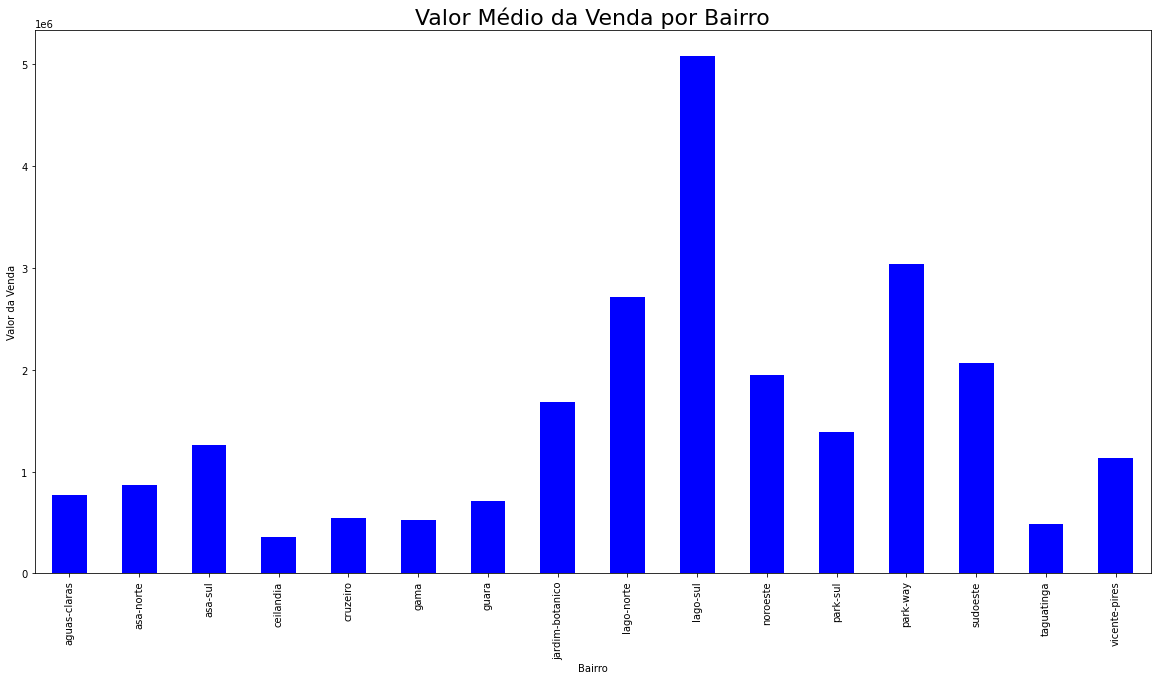

In [317]:
fig = grupo_bairro['Valor'].mean().plot.bar(color='blue')
fig.set_ylabel('Valor da Venda')
fig.set_title('Valor Médio da Venda por Bairro', {'fontsize':22})

Text(0.5, 1.0, 'Valor Médio do m2 por Bairro')

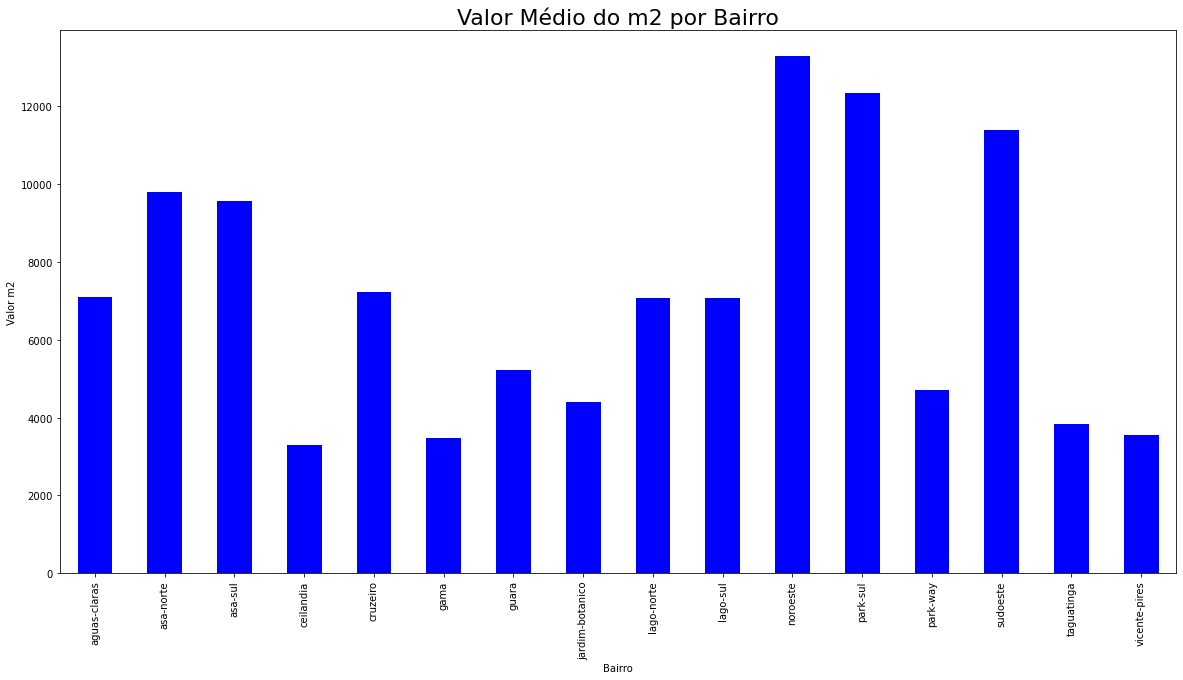

In [318]:
fig = grupo_bairro['Valor m2'].mean().plot.bar(color='blue')
fig.set_ylabel('Valor m2')
fig.set_title('Valor Médio do m2 por Bairro', {'fontsize':22})